# Titanic Dataset Preprocessing

## Importing Libraries

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Load data

In [293]:
train_data = pd.read_csv(r"C:\Users\yahia\#ML Project\Original Dataset\train.csv")
test_data = pd.read_csv(r'C:\Users\yahia\#ML Project\Original Dataset\test.csv')
gender_submission = pd.read_csv(r'C:\Users\yahia\#ML Project\Original Dataset\gender_submission.csv')

## Displaying top 5 rows

In [294]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Shape

In [296]:
train_data.shape

(891, 12)

In [297]:
test_data.shape

(418, 11)

## describing the data

In [298]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Columns


In [299]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data type for each column

In [300]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Number of duplicated data

In [301]:
train_data.duplicated().sum()

0

## Number of missing values

In [302]:
train_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

- The columns 'Age' and 'Cabin' contains more null values.

## Insights

- 'Survived' is the target variable.
- 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
- 'Age' and 'Embarked' has less number of missing value. 
- As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
- 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values.
- We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'.

## Deal with missing values

### Removing unnecessary columns

In [303]:
train_data = train_data.drop(columns=['Cabin','Name','PassengerId','Ticket'])
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [304]:
test_data = test_data.drop(columns=['Cabin','Name','PassengerId','Ticket'])
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [305]:
avgr=0.0
for i in train_data[train_data['Age'].notnull()]['Age']:
    avgr+=i
avgr/=train_data['Age'].count()
train_data[train_data['Age'].isnull()]['Age']=float(avgr)
    

C:\Users\yahia\AppData\Local\Temp\ipykernel_12688\1162492611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[train_data['Age'].isnull()]['Age']=float(avgr)


In [306]:
avgr=0.0
for i in test_data[test_data['Age'].notnull()]['Age']:
    avgr+=i
avgr/=test_data['Age'].count()
test_data[test_data['Age'].isnull()]['Age']=float(avgr)

C:\Users\yahia\AppData\Local\Temp\ipykernel_12688\2809067741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[test_data['Age'].isnull()]['Age']=float(avgr)


### Removing 2 examples with NaN values in 'Embarked'

In [307]:
train_data = train_data.dropna()
test_data = train_data.dropna()

In [308]:
train_data.isnull().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Dealing with categorical data

In [309]:
train_data['Sex']= train_data['Sex'].map({'male':0,'female':1})
test_data['Sex']= test_data['Sex'].map({'male':0,'female':1})

### Embarked classes 

In [310]:
print(train_data['Embarked'].value_counts())

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64


In [311]:
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})
test_data['Embarked'] = test_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [312]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [313]:
corr_matrix = train_data.corr()

<Axes: >

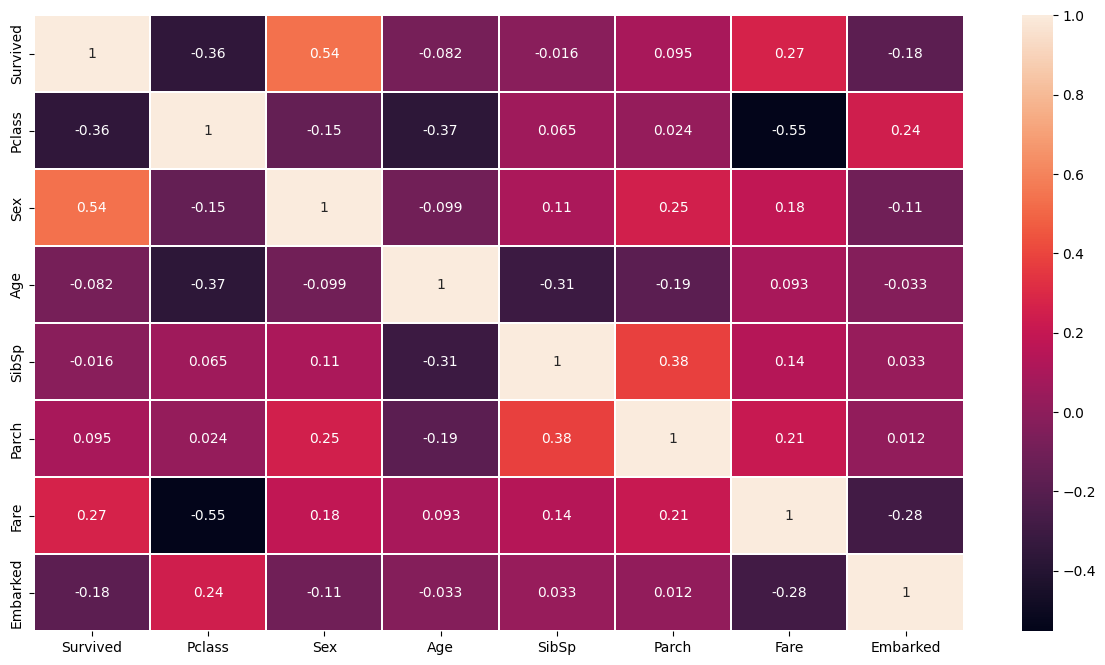

In [314]:
plt.figure(figsize=(15,8))
sns.heatmap(data=corr_matrix, annot=True,linewidths=0.3)

# Data Separation

In [315]:
x_train = train_data.drop(columns='Survived')
y_train = train_data.Survived
y_train = pd.DataFrame({'Survived':y_train.values})

In [316]:
x_test = test_data

# Preprocessed Data

In [317]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,2


In [318]:
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [320]:
x_train.shape

(712, 7)

In [321]:
y_train.shape

(712, 1)

In [322]:
x_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [323]:
x_test.shape

(712, 8)

# Saving Preprocessed Data

In [325]:
x_train.to_csv('./Preprocessed Data/X_train.csv', index=False)
y_train.to_csv('./Preprocessed Data/y_train.csv', index=False)

x_test.to_csv('./Preprocessed Data/X_test.csv', index=False)